## **Data Scaling**

In this tutorial, we’ll study several data scaling and normalisation techniques in Python using both sklearn and
conventional programming, and we’ll share lots of examples. Here are the data scaling techniques we’re going to learn
in this tutorial:
Standard Scaling (Standardization or Z Score)
Minimum – Maximum Scaling (Normalization).
However, there are many other methods of scaling you should consider exploring at your own time, including,
Mean Scaling, Maximum Absolute Scaling, Median and Quantile Scaling, Robust Scaler and Log Scaling


### 1- Data Merge:
Load your Mall_Customers.csv dataset. The Mall management team
contacted their customers and obtained additional data about the same customers, stored in
a different CSV file, Mall_Customers_Additional.csv. Now, you need to merge both files for
analysis. Start by loading both files.


In [1]:
import pandas as pd
df1 = pd.read_csv('/content/Mall_Customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,NaN,NaN,40.0


In [2]:
df2 = pd.read_csv('/content/Mall_Customers_Additional.csv')
df2.head()

,CustomerID,Travel_distance_meters,Dependents
0,1,5040,5
1,2,3492,3
2,3,2795,0
3,4,6315,0
4,5,1978,3


In [3]:
Merged_Mall_df = df1.merge(df2, on='CustomerID')
Merged_Mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,1,Male,19.0,15.0,NaN,5040,5
1,2,Male,NaN,15.0,81.0,3492,3
2,3,Female,20.0,16.0,6.0,2795,0
3,4,Female,23.0,NaN,77.0,6315,0
4,5,Female,NaN,NaN,40.0,1978,3


In [4]:
Merged_Mall_df.to_csv("Merged_Mall_Data.csv", index=False)

### 2- Data Magnitude Variations
Load your new merged dataset and examine its basic stats
using the describe() method. You can see from the above output that our dataset now contains just FIVE numeric
columns, excluding the CustomerID columns. Notice the magnitude (scale) of data for the column is very different
among the “Age”, “Travel_Distance_meters”, and “Dependents” columns. You can easily notice that by looking at
the mean value for each column.

In [5]:
df = pd.read_csv('/content/Merged_Mall_Data.csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
count,200.000000,197.000000,198.000000,199.000000,200.000000,200.000000
mean,100.500000,39.000000,61.005051,50.256281,4915.625000,2.525000
std,57.879185,14.002915,26.017857,25.876350,2796.210913,1.820976
min,1.000000,18.000000,15.000000,1.000000,174.000000,0.000000
25%,50.750000,29.000000,42.250000,34.500000,2324.000000,1.000000
50%,100.500000,36.000000,62.000000,50.000000,4958.000000,3.000000
75%,150.250000,49.000000,78.000000,73.000000,7243.750000,4.000000
max,200.000000,70.000000,137.000000,99.000000,9994.000000,5.000000


When observing the magnitude variations, “Age” values vary in double digits, “Travel_Distance_meters” values
vary in four digits, and “Dependents” values vary in a single digit. columns. You can easily notice that by looking at
the mean value for each column. This can affect the performance of certain machine-learning algorithms.
The above output confirms our three columns are not scaled. The mean, minimum and maximum values, and even the
standard deviation values for all three columns are very different.
This unscaled dataset is not suitable for processing by some statistical algorithms. We need to scale this data so that’s
exactly what we’ll do. We’ll show you different types of data scaling techniques in action.

### 3- Standard Scaling (Standardisation AKA Z-Score)
Several machine learning algorithms, like
linear regression support vector machines (SVMs), assume all the features in a dataset are centred around 0 and have
unit variances. It’s a common practice to apply standard scaling to your data before training these machine learning
algorithms on your dataset.

---

a) In standard scaling, a feature is scaled by subtracting the mean from all the data points and dividing the resultant
values by the standard deviation of the data. To perform this in Python, you must import the relevant library and
packages. Then, to apply the StandardScaler function to the data, we use the fit_transform method. Check the
transformed values for the scaled data to observe the value becoming ratios of the same magnitude.

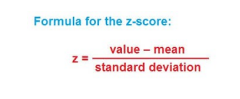

In [6]:
from sklearn.preprocessing import StandardScaler
#drop unnecessary numeric and non-numeric variables
df_numeric = df.drop(columns=(['CustomerID', 'Gender']))
ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)
df_scaled

array([[-1.43191295e+00, -1.77269273e+00,             nan,
         4.45914533e-02,  1.36257170e+00],
       [            nan, -1.77269273e+00,  1.19109751e+00,
        -5.10404082e-01,  2.61503659e-01],
       [-1.36031730e+00, -1.73416016e+00, -1.71461193e+00,
        -7.60295483e-01, -1.39009840e+00],
       [-1.14553036e+00,             nan,  1.03612634e+00,
         5.01709869e-01, -1.39009840e+00],
       [            nan,             nan, -3.97356984e-01,
        -1.05320979e+00,  2.61503659e-01],
       [-1.21712600e+00, -1.69562759e+00,  9.97383551e-01,
         1.05316498e-02, -1.39009840e+00],
       [            nan, -1.65709503e+00, -1.71461193e+00,
        -1.77693580e-01, -1.39009840e+00],
       [-1.14553036e+00, -1.65709503e+00,  1.69475382e+00,
         8.02870237e-01, -2.89030360e-01],
       [ 1.78989118e+00, -1.61856246e+00, -1.83084031e+00,
        -9.20062851e-02, -1.39009840e+00],
       [-6.44360826e-01, -1.61856246e+00,  8.42412380e-01,
         1.53582825e-01

b) The fit_transform() method returns a NumPy array, which you can convert to a Pandas Data frame by passing the
array to the Data frame class constructor in pandas. The following script makes the conversion and prints the header
for our newly scaled dataset.

In [7]:
df_scaled = pd.DataFrame(df_scaled,columns = df_numeric.columns)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,-1.431913,-1.772693,NaN,0.044591,1.362572
1,NaN,-1.772693,1.191098,-0.510404,0.261504
2,-1.360317,-1.734160,-1.714612,-0.760295,-1.390098
3,-1.145530,NaN,1.036126,0.501710,-1.390098
4,NaN,NaN,-0.397357,-1.053210,0.261504


c) Check the basic statistics now for the scaled (standardised) data variables.

In [8]:
df_scaled.describe()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
count,1.970000e+02,198.000000,1.990000e+02,2.000000e+02,2.000000e+02
mean,9.017040e-18,0.000000,5.802171e-17,-8.881784e-18,7.105427e-17
std,1.002548e+00,1.002535,1.002522e+00,1.002509e+00,1.002509e+00
min,-1.503509e+00,-1.772693,-1.908326e+00,-1.699988e+00,-1.390098e+00
25%,-7.159565e-01,-0.722680,-6.104423e-01,-9.291604e-01,-8.395644e-01
50%,-2.147869e-01,0.038338,-9.929057e-03,1.519246e-02,2.615037e-01
75%,7.159565e-01,0.654859,8.811552e-01,8.346893e-01,8.120377e-01
max,2.219465e+00,2.928281,1.888468e+00,1.820721e+00,1.362572e+00


### 4- Minimum-maximum Scaling (Normalisation):
Min/Max scaling normalises the data between 0
and 1 by subtracting the overall minimum value from each data point and dividing the result by the difference between
the minimum and maximum values.
The Min/Max scaler is commonly used for data scaling when the maximum and minimum values for data points are
known. For instance, you can use the min/max scaler to normalise image pixels having values between 0 and 255.

---

a) You’ll want to use the MinMaxScaler class from the sklearn.preprocessing module to
perform min/max scaling. The fit_transform method of the class performs the min/max scaling
on the input Pandas Data frame, as shown below:

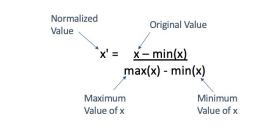


In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_numeric)
df_mms

array([[1.92307692e-02, 0.00000000e+00,            nan, 4.95519348e-01,
        1.00000000e+00],
       [           nan, 0.00000000e+00, 8.16326531e-01, 3.37881874e-01,
        6.00000000e-01],
       [3.84615385e-02, 8.19672131e-03, 5.10204082e-02, 2.66904277e-01,
        0.00000000e+00],
       [9.61538462e-02,            nan, 7.75510204e-01, 6.25356415e-01,
        0.00000000e+00],
       [           nan,            nan, 3.97959184e-01, 1.83706721e-01,
        6.00000000e-01],
       [7.69230769e-02, 1.63934426e-02, 7.65306122e-01, 4.85845214e-01,
        0.00000000e+00],
       [           nan, 2.45901639e-02, 5.10204082e-02, 4.32382892e-01,
        0.00000000e+00],
       [9.61538462e-02, 2.45901639e-02, 9.48979592e-01, 7.10896130e-01,
        4.00000000e-01],
       [8.84615385e-01, 3.27868852e-02, 2.04081633e-02, 4.56720978e-01,
        0.00000000e+00],
       [2.30769231e-01, 3.27868852e-02, 7.24489796e-01, 5.26476578e-01,
        1.00000000e+00],
       [9.42307692e-01, 3.2786

b) The fit_transform() method returns a NumPy array, which you can convert to a Pandas Data frame by passing the
array to the Data frame class constructor in Pandas. The following script makes the conversion and prints the header
for our newly scaled dataset.

In [10]:
df_mms = pd.DataFrame(df_mms,columns = df_numeric.columns)
df_mms.head()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,0.019231,0.000000,NaN,0.495519,1.0
1,NaN,0.000000,0.816327,0.337882,0.6
2,0.038462,0.008197,0.051020,0.266904,0.0
3,0.096154,NaN,0.775510,0.625356,0.0
4,NaN,NaN,0.397959,0.183707,0.6


c) Check the basic statistics now for the scaled (standardised) data variables. Notice that all the variables have a
minimum value of 0 and a maximum of 1

In [11]:
df_mms.describe()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
count,197.000000,198.000000,199.000000,200.000000,200.000000
mean,0.403846,0.377091,0.502615,0.482854,0.505000
std,0.269287,0.213261,0.264044,0.284747,0.364195
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211538,0.223361,0.341837,0.218941,0.200000
50%,0.346154,0.385246,0.500000,0.487169,0.600000
75%,0.596154,0.516393,0.734694,0.719934,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000
